In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('Credit Card Defaulter Prediction.csv')
df.head().T

,0,1,2,3,4
ID,1,2,3,4,5
LIMIT_BAL,20000,120000,90000,50000,50000
SEX,F,F,F,F,M
EDUCATION,University,University,University,University,University
MARRIAGE,Married,Single,Single,Married,Married
AGE,24,26,34,37,57
PAY_0,2,-1,0,0,-1
PAY_2,2,2,0,0,0
PAY_3,-1,0,0,0,-1
PAY_4,-1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  int64 
 1   LIMIT_BAL  30000 non-null  int64 
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  int64 
 6   PAY_0      30000 non-null  int64 
 7   PAY_2      30000 non-null  int64 
 8   PAY_3      30000 non-null  int64 
 9   PAY_4      30000 non-null  int64 
 10  PAY_5      30000 non-null  int64 
 11  PAY_6      30000 non-null  int64 
 12  BILL_AMT1  30000 non-null  int64 
 13  BILL_AMT2  30000 non-null  int64 
 14  BILL_AMT3  30000 non-null  int64 
 15  BILL_AMT4  30000 non-null  int64 
 16  BILL_AMT5  30000 non-null  int64 
 17  BILL_AMT6  30000 non-null  int64 
 18  PAY_AMT1   30000 non-null  int64 
 19  PAY_AMT2   30000 non-null  int64 
 20  PAY_AMT3   30000 non-null  i

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0


In [5]:
df['default '].value_counts()

N    23364
Y     6636
Name: default , dtype: int64

# Exploratory Data Analysis

**1) Distribution of balance limit of credit card of customer**

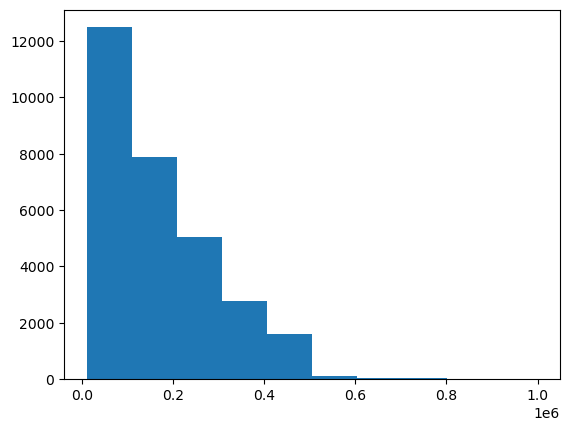

In [6]:
plt.hist(df['LIMIT_BAL'])
plt.show()

**2) How many male and female are credit card defaulter.**
- We fill check the gender of deaulter

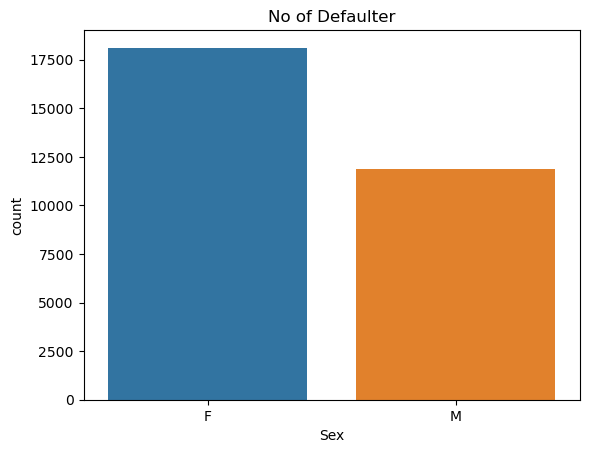

In [7]:
sns.countplot(df['SEX'])
plt.title('No of Defaulter')
plt.xlabel('Sex')
plt.show()

- Almost 14k female are defaulter and 9.5k male are defaulter

**3) Distribution of Age of credit card holder**

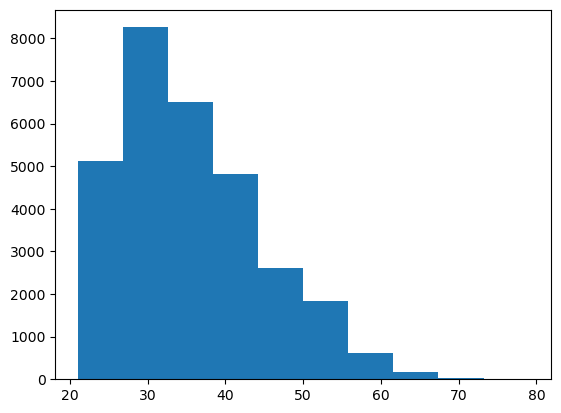

In [8]:
plt.hist(df['AGE'])
plt.show()

**4) What is a qualification of the card holder**

In [9]:
df.loc[df['EDUCATION'] == 'Others', 'EDUCATION'] = 'Unknown'
df.loc[df['EDUCATION'] == '0', 'EDUCATION'] = 'Unknown'
df2 = df['EDUCATION'].value_counts().reset_index()
df2.columns = ['Education', 'No of people']

In [10]:
df2

,Education,No of people
0,University,14030
1,Graduate school,10585
2,High School,4917
3,Unknown,468


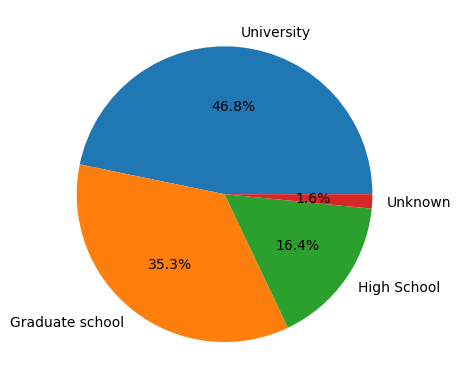

In [11]:
plt.pie(df2['No of people'],labels=df2['Education'],autopct='%0.1f%%')
plt.show()

47% of them have university qualification

35% of them have graduate school qualification 16% of them have high school 

qualification 2% of them qualification are unknown

**5) Total number of defaulte**

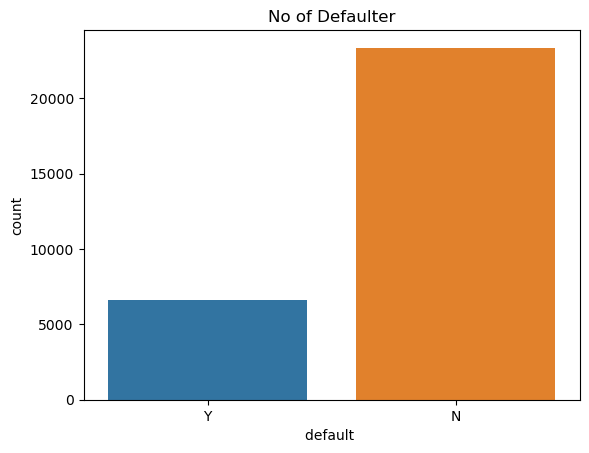

In [12]:
sns.countplot(df['default '])
plt.title('No of Defaulter')
plt.show()

In [13]:
cat_col = ['EDUCATION','MARRIAGE', 'SEX' ]

num_col = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
           'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
          'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5', 'PAY_AMT6']


input_col = ['EDUCATION','MARRIAGE', 'SEX','LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
           'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
          'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5', 'PAY_AMT6']

target_col = ['default ']

In [14]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,M,High School,Married,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,N
29996,29997,150000,M,High School,Single,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,N
29997,29998,30000,M,University,Single,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,Y
29998,29999,80000,M,High School,Married,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,Y


In [15]:
X = df.drop('default ',axis=1)
y = df['default ']

In [16]:
X = pd.get_dummies(X,drop_first=True)

In [17]:
X

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_M,EDUCATION_High School,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,0,1,0,1,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,1000,0,2000,0,0,1,0,0,0,1
2,3,90000,34,0,0,0,0,0,0,29239,...,1000,1000,5000,0,0,1,0,0,0,1
3,4,50000,37,0,0,0,0,0,0,46990,...,1100,1069,1000,0,0,1,0,1,0,0
4,5,50000,57,-1,0,-1,0,0,0,8617,...,9000,689,679,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,39,0,0,0,0,0,0,188948,...,3047,5000,1000,1,1,0,0,1,0,0
29996,29997,150000,43,-1,-1,-1,-1,0,0,1683,...,129,0,0,1,1,0,0,0,0,1
29997,29998,30000,37,4,3,2,-1,0,0,3565,...,4200,2000,3100,1,0,1,0,0,0,1
29998,29999,80000,41,1,-1,0,0,0,-1,-1645,...,1926,52964,1804,1,1,0,0,1,0,0


In [18]:
X.drop('EDUCATION_Unknown',axis=1,inplace=True)

In [19]:
X

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_M,EDUCATION_High School,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,0,0,1,1,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,1000,1000,0,2000,0,0,1,0,0,1
2,3,90000,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,0,0,1,0,0,1
3,4,50000,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,0,0,1,1,0,0
4,5,50000,57,-1,0,-1,0,0,0,8617,...,10000,9000,689,679,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,39,0,0,0,0,0,0,188948,...,5003,3047,5000,1000,1,1,0,1,0,0
29996,29997,150000,43,-1,-1,-1,-1,0,0,1683,...,8998,129,0,0,1,1,0,0,0,1
29997,29998,30000,37,4,3,2,-1,0,0,3565,...,22000,4200,2000,3100,1,0,1,0,0,1
29998,29999,80000,41,1,-1,0,0,0,-1,-1645,...,1178,1926,52964,1804,1,1,0,1,0,0


In [20]:
y = y.replace({"Y":1,"N":0})

In [21]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default , Length: 30000, dtype: int64

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [23]:
def find_best_model(X,y):
    models = {'ada_boost':{
        'model':AdaBoostClassifier(),
        'parameters':{'n_estimators':list(range(1,101)),
                     }
                    },
              'xgboost':{'model':XGBClassifier(),
                      'parameters':{
                          'n_estimators':list(range(1,101)),
                          'max_depth':list(range(1,17)),
                          'gamma':[0,0.15,0.3,0.5,1]
                      }},
              'gradientboost':{'model':GradientBoostingClassifier(),
                      'parameters':{'n_estimators':list(range(1,101)),
                                    'learning_rate':[0.1,0.2,0.3,0.5,0.8,1]
                          
                      }},
             
              'svc':{'model':SVC(),
                    'parameters':{'C':[0.01,0.1,1,10,100],
                                 'kernel':['linear','rbf','sigmoid','poly']}},
              'decision tree':{
                  'model': DecisionTreeClassifier(random_state=0),
                  'parameters':{
                      'criterion':['gini','entropy'],
                      'max_depth': list(range(1,17))
                  }},
              'random forest': {'model':
                               RandomForestClassifier(random_state=0),
                               'parameters':{
                                   'n_estimators':list(range(1,101))
                               }},
              'knn':{'model':KNeighborsClassifier(),
                    'parameters':{
                    'n_neighbors':[2,5,10,20],
                    'p':[1,2]}}
              
             }
    scores = []
    for model_name,model_params in models.items():
        gs = GridSearchCV(model_params['model'],model_params['parameters'],cv=5,return_train_score=False)
        gs.fit(X,y)
        scores.append({'model':model_name,
                      'best_parameters':gs.best_params_,'score':
                      gs.best_score_ })
    return pd.DataFrame(scores,columns=['model','best_parameters','score'])

In [24]:
#%%time
#find_best_model(X,y)

In [25]:
y.value_counts()

0    23364
1     6636
Name: default , dtype: int64

In [26]:
#from imblearn.under_sampling import RandomUnderSampler
#rs = RandomUnderSampler(random_state=42)
#X,y = rs.fit_resample(X,y)

In [27]:
y.value_counts()

0    23364
1     6636
Name: default , dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=9)

In [29]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)
ypred_train = model1.predict(X_train)
ypred_test = model1.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training Accuracy:',accuracy_score(ypred_train,y_train))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))
from sklearn.model_selection import cross_val_score
print('Cross Validation Score:',cross_val_score(model1,X,y,cv=5).mean())

Training Accuracy: 0.7785416666666667
Test Accuracy: 0.7798333333333334
Cross Validation Score: 0.7788666666666668


In [30]:
model2 = DecisionTreeClassifier(random_state=0)
model2.fit(X_train,y_train)
ypred_train = model2.predict(X_train)
ypred_test = model2.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training Accuracy:',accuracy_score(ypred_train,y_train))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))
from sklearn.model_selection import cross_val_score
print('Cross Validation Score:',cross_val_score(model2,X,y,cv=5).mean())

Training Accuracy: 1.0
Test Accuracy: 0.7208333333333333
Cross Validation Score: 0.6866


In [31]:
model3 = RandomForestClassifier(random_state=0)
model3.fit(X_train,y_train)
ypred_train = model3.predict(X_train)
ypred_test = model3.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training Accuracy:',accuracy_score(ypred_train,y_train))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))
from sklearn.model_selection import cross_val_score
print('Cross Validation Score:',cross_val_score(model3,X,y,cv=5).mean())

Training Accuracy: 0.9999583333333333
Test Accuracy: 0.8168333333333333
Cross Validation Score: 0.8145666666666667


In [32]:
model4 = AdaBoostClassifier()
model4.fit(X_train,y_train)
ypred_train = model4.predict(X_train)
ypred_test = model4.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training Accuracy:',accuracy_score(ypred_train,y_train))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))
from sklearn.model_selection import cross_val_score
print('Cross Validation Score:',cross_val_score(model4,X,y,cv=5).mean())

Training Accuracy: 0.8186666666666667
Test Accuracy: 0.8146666666666667
Cross Validation Score: 0.7976666666666667


In [33]:
model5 = GradientBoostingClassifier()
model5.fit(X_train,y_train)
ypred_train = model5.predict(X_train)
ypred_test = model5.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training Accuracy:',accuracy_score(ypred_train,y_train))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))
from sklearn.model_selection import cross_val_score
print('Cross Validation Score:',cross_val_score(model5,X,y,cv=5).mean())

Training Accuracy: 0.82775
Test Accuracy: 0.8183333333333334
Cross Validation Score: 0.7898666666666667


In [34]:
model6 = XGBClassifier(random_state=0)
model6.fit(X_train,y_train)
ypred_train = model6.predict(X_train)
ypred_test = model6.predict(X_test)
from sklearn.metrics import accuracy_score
print('Training Accuracy:',accuracy_score(ypred_train,y_train))
print('Test Accuracy:',accuracy_score(ypred_test,y_test))
from sklearn.model_selection import cross_val_score
print('Cross Validation Score:',cross_val_score(model6,X,y,cv=5).mean())

Training Accuracy: 0.8915833333333333
Test Accuracy: 0.8135
Cross Validation Score: 0.6694666666666668


In [ ]:
estimator = RandomForestClassifier(random_state=0)
param_grid = {'n_estimators':list(range(1,501))}
grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
grid.fit(X_train,y_train)
grid.best_params_